#ovo se mora jer inace geopandas ne radi

In [3]:
pip install Rtree==0.9.3 

Note: you may need to restart the kernel to use updated packages.


In [5]:
import rasterio
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import mapping
from rasterio import mask as msk
import numpy as np
import json
from rasterio import mask as msk
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size

# site za topograf data
https://topotools.cr.usgs.gov/gmted_viewer/viewer.htm

# site za drzave kad se importa geopandas
https://www.naturalearthdata.com/downloads/10m-cultural-vectors/

# topografska mapa

In [6]:
file = rasterio.open(r'../data/30N000E_20101117_gmted_mea075.tif')
dataset = file.read()
print(dataset.shape)

(1, 9600, 14400)


# drzava koju zelimo 

kad se kopira data za drzave treba se kopirati sve sto je u mapi inace shp ne radi 

In [59]:
cities = gpd.read_file(r"../data/cities.geojson")

,NAME,geometry
0,TORSHAVN,"POLYGON ((-6.75864 62.01517, -6.76184 62.01528..."
1,LERWICK,"POLYGON ((-1.16446 60.16395, -1.16168 60.16221..."
2,HONNINGSVAG,"POLYGON ((26.00776 70.97373, 25.99542 70.97484..."
3,DYFJORD,"POLYGON ((27.31813 70.95710, 27.31875 70.95818..."
4,HAMMERFEST,"POLYGON ((23.68397 70.67101, 23.68239 70.67120..."
...,...,...
34467,PORT SHEPSTONE,"POLYGON ((30.54260 -30.63280, 30.51392 -30.672..."
34468,PORT EDWARD,"POLYGON ((30.30874 -30.94483, 30.30424 -30.959..."
34469,PORT EDWARD,"POLYGON ((30.25818 -31.01285, 30.24006 -31.030..."
34470,PORT EDWARD,"POLYGON ((30.23326 -31.04942, 30.23305 -31.050..."


In [61]:
Graz = cities.loc[cities['NAME']=='GRAZ']

In [63]:
Graz.geometry

6797    POLYGON ((15.38139 47.06486, 15.37872 47.06753...
Name: geometry, dtype: geometry

In [53]:
styria = gpd.read_file(r"../data/styria.geojson")

In [54]:
styria = styria.drop(0,axis=0)

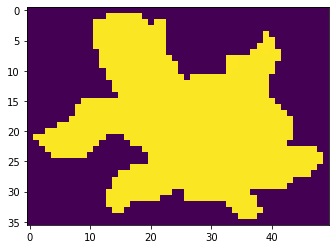

In [65]:
clipped_array, clipped_transform = msk.mask(file, [mapping(Graz.iloc[0].geometry)], crop=True)

plt.imshow(clipped_array[0])
plt.show()

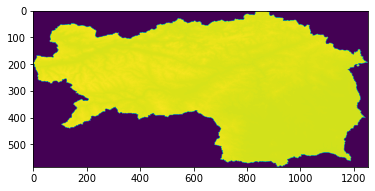

In [34]:
clipped_array, clipped_transform = msk.mask(file, [mapping(styria.iloc[0].geometry)], crop=True)

plt.imshow(clipped_array[0])
plt.show()

# funkcija za spajanje topo data i country

In [35]:
def clip_raster(gdf, img):
    clipped_array, clipped_transform = msk.mask(img, [mapping(gdf.iloc[0].geometry)], crop=True)
    clipped_array, clipped_transform = msk.mask(img, [mapping(gdf.iloc[0].geometry)],
                                                           crop=True, nodata=(np.amax(clipped_array[0]) + 1))
    clipped_array[0] = clipped_array[0] + abs(np.amin(clipped_array))
    value_range = np.amax(clipped_array) + abs(np.amin(clipped_array))
    return clipped_array, value_range



# Austria

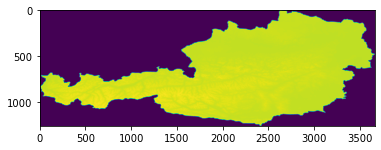

In [39]:
df = gpd.read_file('../data/ne_10m_admin_0_countries.shp')

country = df.loc[df['ADMIN'] == 'Austria']

clipped_array, clipped_transform = msk.mask(file, [mapping(country.iloc[0].geometry)], crop=True)

plt.imshow(clipped_array[0])
plt.show()

In [41]:
aspect = 10
pad_fraction = 0.5

In [40]:
Austria_topography, value_range = clip_raster(country, file)

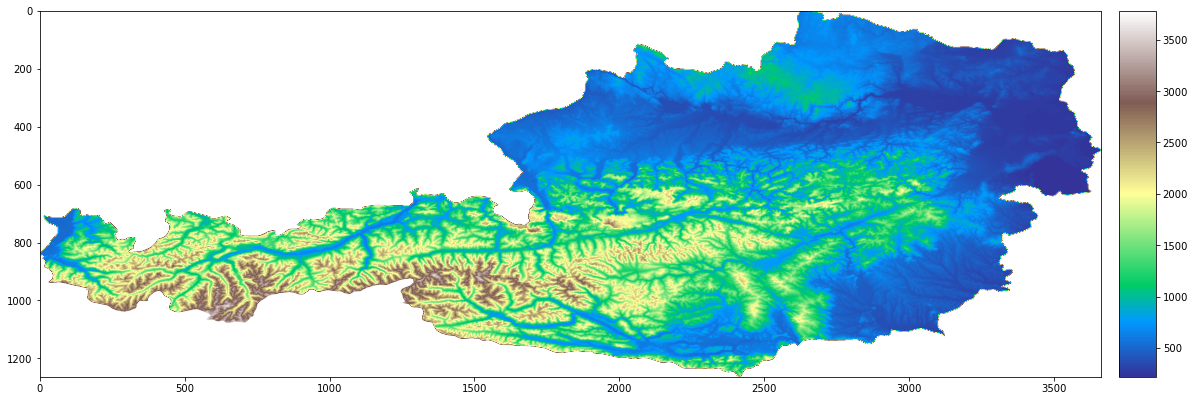

In [43]:
plt.figure(figsize=(20,20))
ax = plt.gca()

im = ax.imshow(Austria_topography[0], cmap='terrain')
divider = make_axes_locatable(ax)
width = axes_size.AxesY(ax, aspect=1./aspect)
pad = axes_size.Fraction(pad_fraction, width)
cax = divider.append_axes("right", size=width, pad=pad)
plt.colorbar(im, cax=cax)

# Styria

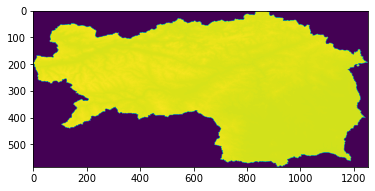

In [44]:
clipped_array, clipped_transform = msk.mask(file, [mapping(styria.iloc[1].geometry)], crop=True)

plt.imshow(clipped_array[0])
plt.show()

In [55]:
aspect = 10
pad_fraction = 0.5

In [56]:
styria_topography, value_range = clip_raster(styria , file)

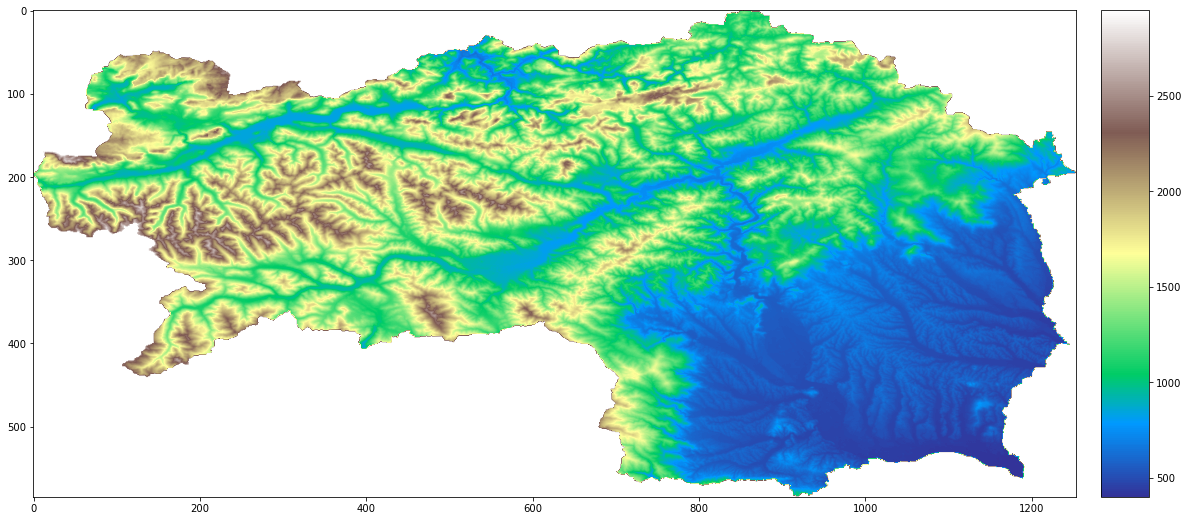

In [57]:
plt.figure(figsize=(20,20))
ax = plt.gca()

im = ax.imshow(styria_topography[0], cmap='terrain')
divider = make_axes_locatable(ax)
width = axes_size.AxesY(ax, aspect=1./aspect)
pad = axes_size.Fraction(pad_fraction, width)
cax = divider.append_axes("right", size=width, pad=pad)
plt.colorbar(im, cax=cax)

# graz

In [66]:
test = gpd.read_file(r"../data/test.geojson")

In [67]:
test

,id,wikidata_id,title,name,alt_name,source,source_name,administrative_unit,adm_name,start_date,end_date,date_accuracy,spatial_extent,spatial_extent_sqm,parents,slugged_name,geometry
0,11324,Q13298,Graz (Stadt),Graz (Stadt),,https://histogis.acdh.oeaw.ac.at/api/source/21...,Cisleithanien Districts 1914,https://histogis.acdh.oeaw.ac.at/api/skosconce...,Statutory City,1850-01-01,1918-10-31,Y,0.002788,23.540469,"[ { ""id"": 12614, ""start_date"": ""1850-02-01"", ""...",graz-stadt__1850-01-01_1918-10-31,"MULTIPOLYGON (((15.41251 47.05264, 15.41338 47..."


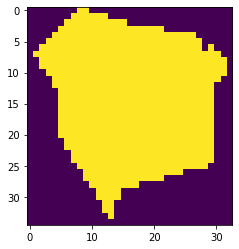

In [68]:
clipped_array, clipped_transform = msk.mask(file, [mapping(test.iloc[0].geometry)], crop=True)

plt.imshow(clipped_array[0])
plt.show()

In [71]:
test_topography, value_range = clip_raster(test, file)

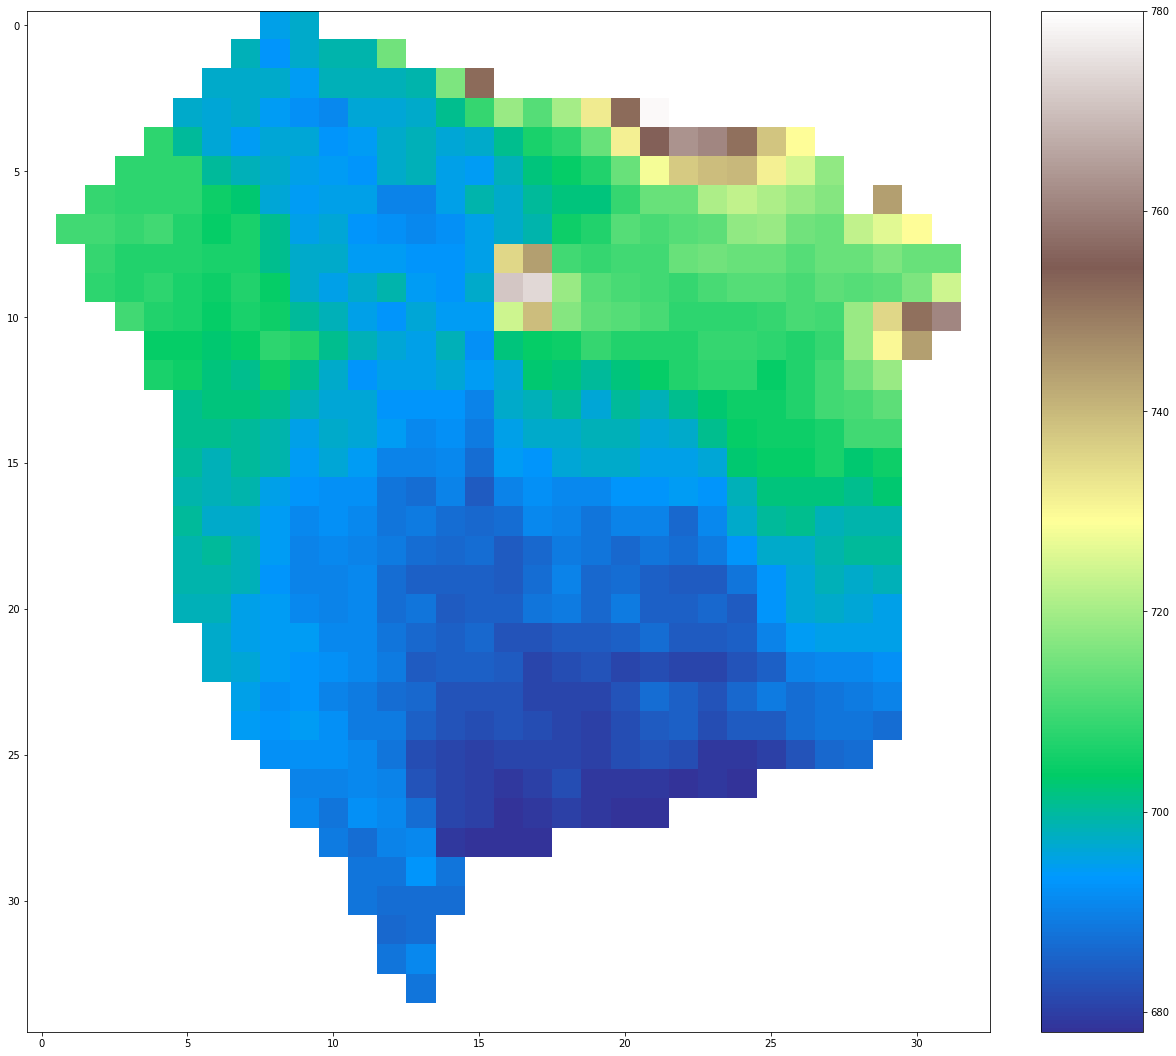

In [72]:
plt.figure(figsize=(20,20))
ax = plt.gca()

im = ax.imshow(test_topography[0], cmap='terrain')
divider = make_axes_locatable(ax)
width = axes_size.AxesY(ax, aspect=1./aspect)
pad = axes_size.Fraction(pad_fraction, width)
cax = divider.append_axes("right", size=width, pad=pad)
plt.colorbar(im, cax=cax)